In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [25]:
# define array of CST concentrations to plot over
CST_initialcon = 1000000 #nM
cCST = []

for i in range(25):
        cCST.append(CST_initialcon/(2.0**i))

cCST = np.array(cCST)

cCST = cCST*3.


# define simulation parameters 
cDNA = 5.0 #nM
ctel = 2. #nM 
Kd1 = 2.2 #nM - CST-DNA
Kd2 = 2.2 #nM - telomerase-DNA
gamma = 1.0  #activity coefficient

In [26]:
#define exact equation

def eq4(cCST=cCST,cDNA=cDNA,gamma=gamma,Kd1=Kd1,Kd2=Kd2,ctel=ctel): 
#equation 4: NO assumptions
#inputs: np.array of CST concentrations, DNA concentration, Telomerase concentration, Kds for Tel.DNA and CST.DNA
    
    cCST = gamma*cCST
    
    a = np.array(Kd1 + Kd2 + cCST + ctel - cDNA)
    b = np.array(Kd2*(cCST-cDNA) + Kd1*(ctel-cDNA) + Kd1*Kd2)
    c = -Kd1*Kd2*cDNA
    theta = np.arccos( ((-2.0*a**3)+9*a*b-27*c)/(2*np.sqrt( (a**2-3*b)**3)) )


    ctel_cDNA = (ctel*(2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a))/(3*Kd2+2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a) #nM
    cCST_DNA = (cCST*(2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a))/(3*Kd1+2*np.sqrt(a**2-3*b)*np.cos(theta/3)-a)  #nM
    cDNA_free = -(a/3) + (2/3)*np.sqrt(a**2-3*b)*np.cos(theta/3)   #nM

    eq4_fractionbound_1 = ctel_cDNA/cDNA
    eq4_fractionbound_n_1 = eq4_fractionbound_1/np.max(eq4_fractionbound_1)
    
    cCST = cCST/gamma
    
    
    return eq4_fractionbound_n_1

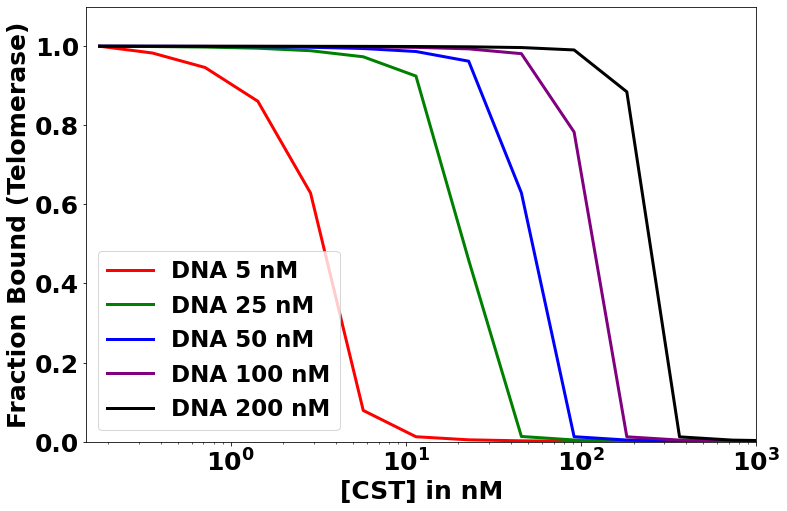

In [27]:
# Plot Ratio Kd CST-DNA to Kd Telomerase-DNA = 0.01

matplotlib.rc('font', weight='bold')
plt.figure(figsize=(12,8))
plt.rc('font', size=25) 
plt.ylim(0.0,1.1)
plt.xlim(0.15,1000)
plt.xscale('log')
plt.xlabel('[CST] in nM', fontweight='bold')
plt.ylabel('Fraction Bound (Telomerase)', fontweight='bold')

dna5 = eq4(cCST=cCST,cDNA=5,Kd1=2.2*0.01)
dna50 = eq4(cCST=cCST,cDNA=50,Kd1=2.2*0.01)
dna25 = eq4(cCST=cCST,cDNA=25,Kd1=2.2*0.01)
dna100 = eq4(cCST=cCST,cDNA=100,Kd1=2.2*0.01)
dna200 = eq4(cCST=cCST,cDNA=200,Kd1=2.2*0.01)

plt.plot(cCST,dna5,c='red', label  = 'DNA 5 nM',linewidth=3.0)
plt.plot(cCST,dna25,c='green', label  = 'DNA 25 nM',linewidth=3.0)
plt.plot(cCST,dna50,c='blue', label  = 'DNA 50 nM',linewidth=3.0)
plt.plot(cCST,dna100,c='purple', label  = 'DNA 100 nM',linewidth=3.0)
plt.plot(cCST,dna200,c='black', label  = 'DNA 200 nM',linewidth=3.0)
plt.legend()

plt.legend(prop={"size":23})

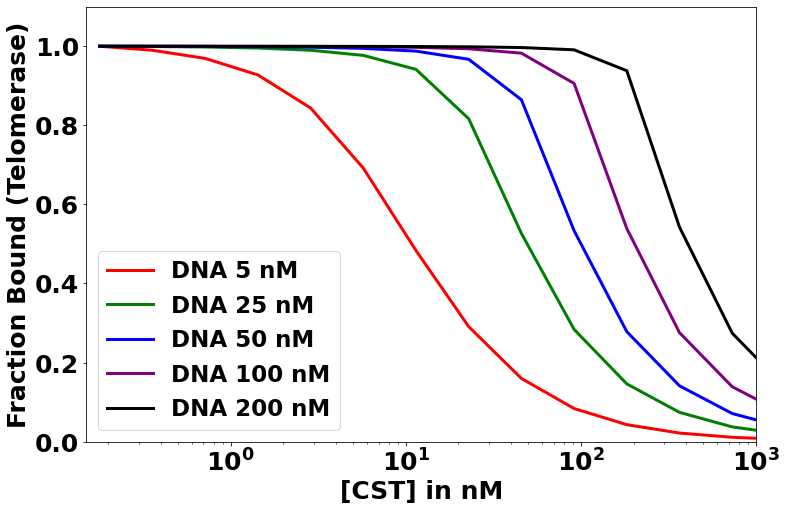

In [28]:
# Plot Ratio Kd CST-DNA to Kd Telomerase-DNA = 1

matplotlib.rc('font', weight='bold')
plt.figure(figsize=(12,8))
plt.rc('font', size=25) 
plt.ylim(0.0,1.1)
plt.xlim(0.15,1000)
plt.xscale('log')
plt.xlabel('[CST] in nM', fontweight='bold')
plt.ylabel('Fraction Bound (Telomerase)', fontweight='bold')

dna5 = eq4(cCST=cCST,cDNA=5,Kd1=2.2)
dna50 = eq4(cCST=cCST,cDNA=50,Kd1=2.2)
dna25 = eq4(cCST=cCST,cDNA=25,Kd1=2.2)
dna100 = eq4(cCST=cCST,cDNA=100,Kd1=2.2)
dna200 = eq4(cCST=cCST,cDNA=200,Kd1=2.2)

plt.plot(cCST,dna5,c='red', label  = 'DNA 5 nM',linewidth=3.0)
plt.plot(cCST,dna25,c='green', label  = 'DNA 25 nM',linewidth=3.0)
plt.plot(cCST,dna50,c='blue', label  = 'DNA 50 nM',linewidth=3.0)
plt.plot(cCST,dna100,c='purple', label  = 'DNA 100 nM',linewidth=3.0)
plt.plot(cCST,dna200,c='black', label  = 'DNA 200 nM',linewidth=3.0)
plt.legend()

plt.legend(prop={"size":23})

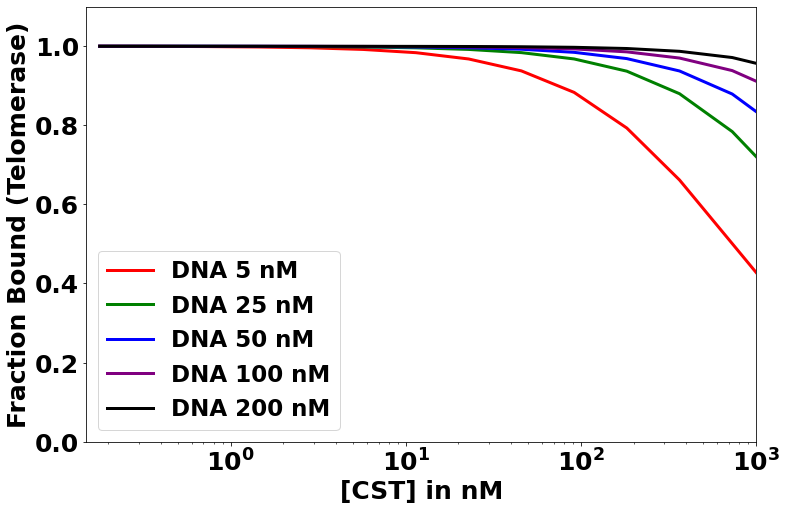

In [29]:
# Plot Ratio Kd CST-DNA to Kd Telomerase-DNA = 100

matplotlib.rc('font', weight='bold')
plt.figure(figsize=(12,8))
plt.rc('font', size=25) 
plt.ylim(0.0,1.1)
plt.xlim(0.15,1000)
plt.xscale('log')
plt.xlabel('[CST] in nM', fontweight='bold')
plt.ylabel('Fraction Bound (Telomerase)', fontweight='bold')

Kd1 = 2.2*1000000 #nM - CST-DNA

dna5 = eq4(cCST=cCST,cDNA=5,Kd1=2.2*100)
dna50 = eq4(cCST=cCST,cDNA=50,Kd1=2.2*100)
dna25 = eq4(cCST=cCST,cDNA=25,Kd1=2.2*100)
dna100 = eq4(cCST=cCST,cDNA=100,Kd1=2.2*100)
dna200 = eq4(cCST=cCST,cDNA=200,Kd1=2.2*100)

plt.plot(cCST,dna5,c='red', label  = 'DNA 5 nM',linewidth=3.0)
plt.plot(cCST,dna25,c='green', label  = 'DNA 25 nM',linewidth=3.0)
plt.plot(cCST,dna50,c='blue', label  = 'DNA 50 nM',linewidth=3.0)
plt.plot(cCST,dna100,c='purple', label  = 'DNA 100 nM',linewidth=3.0)
plt.plot(cCST,dna200,c='black', label  = 'DNA 200 nM',linewidth=3.0)
plt.legend()

plt.legend(prop={"size":23})